# Solvers in action

We have three models which solve the __left-right-adjacency-problem__, namely

* AdjacencyClassifier_NoML 
* FromScratch
* ResNetFT

These models, used with our search template, yield three solvers, which we'll call by the same names. For comparison, let's throw in the __RandomScorer__ Solver (which is based on the dummy model that assigns adjacency scores randomly).

We run these solvers on two puzzles for a qualitative analysis.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
from itertools import product


import pprint
import itertools
from collections import defaultdict
import copy

# generate random integer values
import random
from random import seed
from random import randint
import numpy as np
from pylab import array
from random import sample
import math

from Puzzle_generator import *
from Checking_adjacency_dataset import *
from FromScratch_CNN import *
from ResNetFT_Finetuning import *
from Training_template import *
from Adjacency_distance import *
from Search_template import *

import torch
from torch.utils.data import Dataset, DataLoader, IterableDataset
from torchvision import transforms, utils
from torch import nn, optim
from torchvision import datasets, transforms
#from torchvision.utils import make_grid

In [2]:
import time


# Checking GPU availability

In [3]:
if torch.cuda.is_available():
    GpuAvailable=True
    my_device = torch.device("cuda:0")   
    print("Running on the GPU")
else:
    GpuAvailable=False
    my_device = torch.device("cpu")
    print("Running on the CPU")



Running on the CPU


# Loading models

In [4]:
my_learning_rate = 0.001
my_momentum = 0.9

In [5]:
model_names = ['RandomScorer','AdjacencyClassifier_NoML', 'FromScratch', 'ResNetFT']
models = [None, AdjacencyClassifier_NoML()]
for i in [2,3]:
    model_name=model_names[i]
    model,loss_criterion,optimizer = make_model_lc_optimizer(model_name,
                                                             my_learning_rate,
                                                             my_momentum)
    best_model_path=f"./best_model_for_{model_name}.pt"
    model, optimizer, epochs_trained, min_val_loss = load_checkpoint_gpu(best_model_path,
                                                                         model, 
                                                                         optimizer,
                                                                         GpuAvailable)
    model.eval()
    models.append(model)
    if 'GpuAvailable':
        models[i].to(my_device)

    
    
    

Using FromScratch - Expect more number of parameters to learn!
	 bigunit.0.conv1.weight
	 bigunit.0.conv2.weight
	 bigunit.0.unit.2.weight
	 bigunit.0.unit.2.bias
	 bigunit.0.unit.5.weight
	 bigunit.0.unit.5.bias
	 bigunit.1.conv1.weight
	 bigunit.1.conv2.weight
	 bigunit.1.unit.2.weight
	 bigunit.1.unit.2.bias
	 bigunit.1.unit.5.weight
	 bigunit.1.unit.5.bias
	 bigunit.2.conv1.weight
	 bigunit.2.conv2.weight
	 bigunit.2.unit.2.weight
	 bigunit.2.unit.2.bias
	 bigunit.2.unit.5.weight
	 bigunit.2.unit.5.bias
	 bigunit.3.conv1.weight
	 bigunit.3.conv2.weight
	 bigunit.3.unit.2.weight
	 bigunit.3.unit.2.bias
	 bigunit.3.unit.5.weight
	 bigunit.3.unit.5.bias
	 bigunit.4.conv1.weight
	 bigunit.4.conv2.weight
	 bigunit.4.unit.2.weight
	 bigunit.4.unit.2.bias
	 bigunit.4.unit.5.weight
	 bigunit.4.unit.5.bias
	 bigunit.5.conv1.weight
	 bigunit.5.conv2.weight
	 bigunit.5.unit.2.weight
	 bigunit.5.unit.2.bias
	 bigunit.5.unit.5.weight
	 bigunit.5.unit.5.bias
	 fc1.weight
	 fc1.bias
	 bn1.weight


# Solver helper function

In [6]:
def run_solver(images,i):
    for image_name in images:
        my_model_name = model_names[i]
        my_model = models[i]
        print("")
        solve_example(image_name,my_puzzle_square_piece_dim,
                      my_model_name, my_model,
                      show_solving_progress=False,input_display=False)
        print("")
    

# The inputs

In [7]:
puzzle_images = ['image_1.jpg','image_2.jpg']
my_puzzle_square_piece_dim = 150

****************
puzzle_piece_length is 150
puzzle_piece_width is 150
no of rows are 3
no of cols are 3
no_of_puzzle_pieces are 9
****************


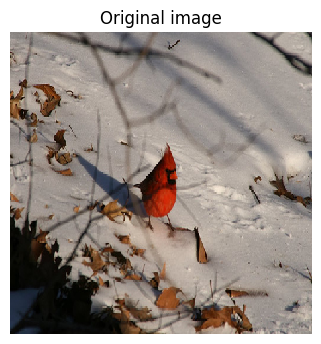

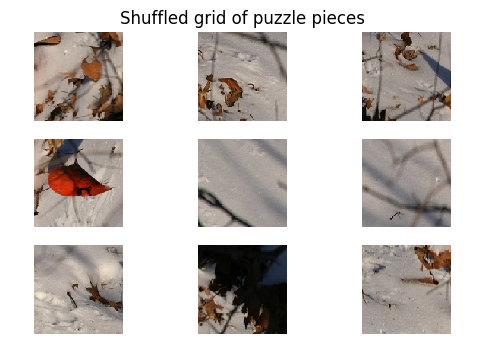

In [8]:
input_0 = get_puzzle_pieces(puzzle_images[0],my_puzzle_square_piece_dim, display=True)

****************
puzzle_piece_length is 150
puzzle_piece_width is 150
no of rows are 2
no of cols are 2
no_of_puzzle_pieces are 4
****************


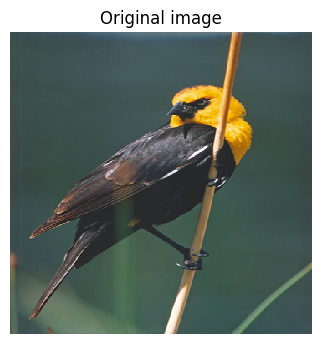

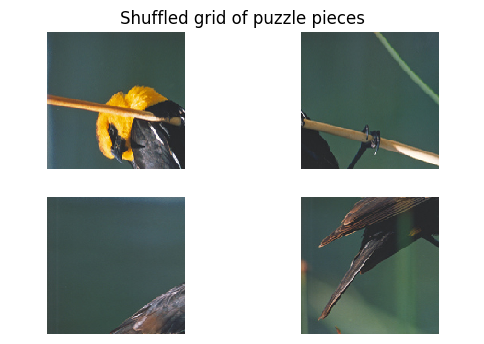

In [9]:
input_1 = get_puzzle_pieces(puzzle_images[1],my_puzzle_square_piece_dim, display=True)

# Running the solvers

## RandomScorer


Solving image_1.jpg...
*****************
Solved puzzle using RandomScorer solver


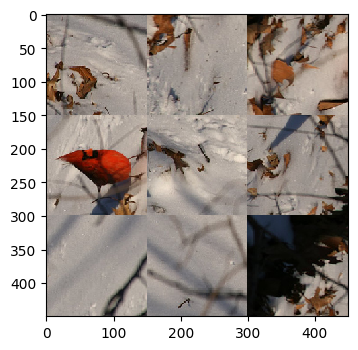

*******************
In correct position: 1
In correct position and rotation: 1


Solving image_2.jpg...
*****************
Solved puzzle using RandomScorer solver


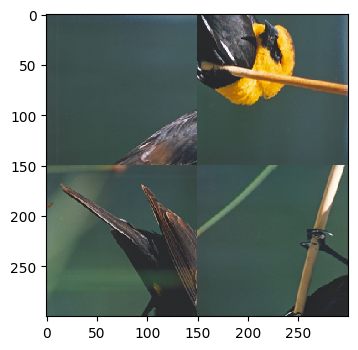

*******************
In correct position: 4
In correct position and rotation: 1

Time take for RandomScorer = 1.2346370220184326 seconds


In [10]:
start_time = time.time()
run_solver(puzzle_images,0)
print(f"Time take for RandomScorer = {time.time()-start_time} seconds")

## AdjacencyClassifier_NoML 


Solving image_1.jpg...
*****************
Solved puzzle using AdjacencyClassifier_NoML solver


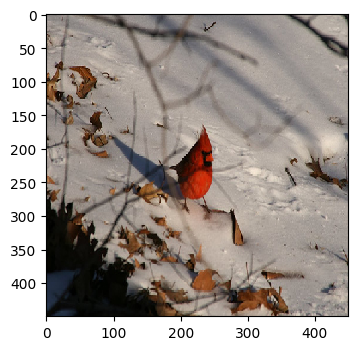

*******************
In correct position: 9
In correct position and rotation: 9


Solving image_2.jpg...
*****************
Solved puzzle using AdjacencyClassifier_NoML solver


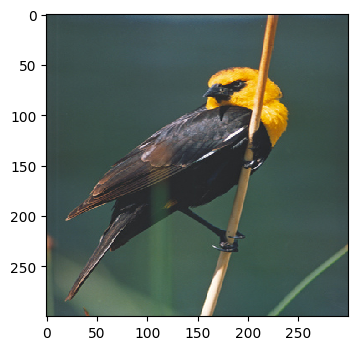

*******************
In correct position: 4
In correct position and rotation: 4

Time take for AdjacencyClassifier_NoML  = 1.412754774093628 seconds


In [11]:
start_time = time.time()
run_solver(puzzle_images,1)
print(f"Time take for AdjacencyClassifier_NoML  = {time.time()-start_time} seconds")

## FromScratch






Solving image_1.jpg...
*****************
Solved puzzle using FromScratch solver


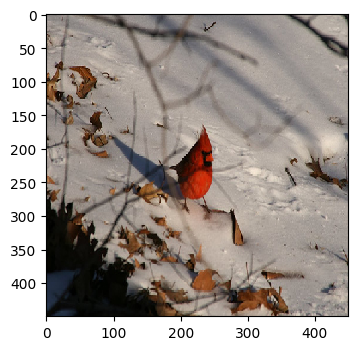

*******************
In correct position: 9
In correct position and rotation: 9


Solving image_2.jpg...
*****************
Solved puzzle using FromScratch solver


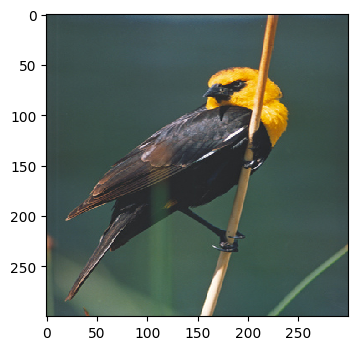

*******************
In correct position: 4
In correct position and rotation: 4

Time take for FromScratch = 5.606786012649536 seconds


In [12]:
start_time = time.time()
run_solver(puzzle_images,2)
print(f"Time take for FromScratch = {time.time()-start_time} seconds")

## ResNetFT


Solving image_1.jpg...
*****************
Solved puzzle using ResNetFT solver


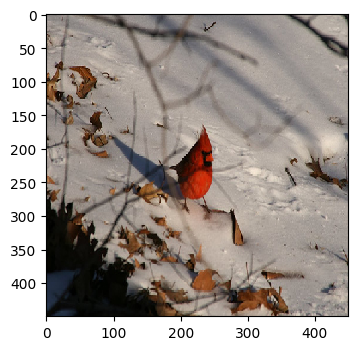

*******************
In correct position: 9
In correct position and rotation: 9


Solving image_2.jpg...
*****************
Solved puzzle using ResNetFT solver


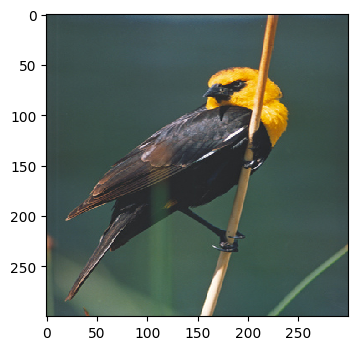

*******************
In correct position: 4
In correct position and rotation: 4

Time take for ResNetFT = 29.184174060821533 seconds


In [13]:
start_time = time.time()
run_solver(puzzle_images,3)
print(f"Time take for ResNetFT = {time.time()-start_time} seconds")

# Summary

Looking cursorily at the two input puzzles, it looks like all the three models solve the puzzles completely correctly!


For the two examples put together, AdjacencyClassifier_NoML is the quickest, taking around 1.4 seconds, FromScratch takes 5 seconds, while ResNetFT takes nearly 30 seconds. Note that we are running on a CPU though


Further quantitative evaluation will be carried out to determine the efficacies of the solvers